[[ 0.88741879 -1.26994177]
 [-0.45715513  0.65421243]]


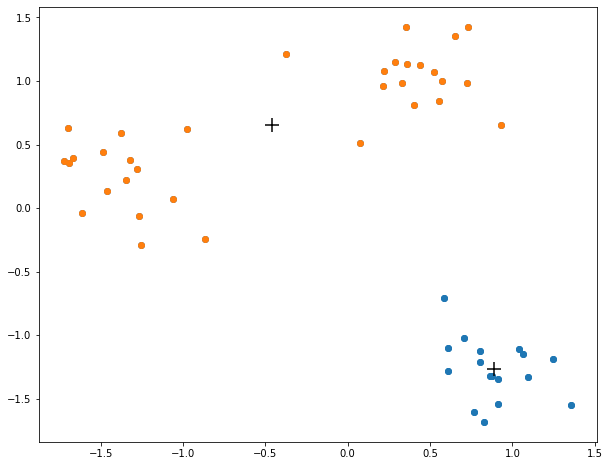

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
#permite la generación de (clusters) de datos con distribución gausiana.
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 50, n_features = 2, centers = 3, cluster_std  = 0.40,shuffle = True, random_state = 0)

X_norm = scale(X)

wcss = []
for i in range (1, 11):
  kmeans = KMeans (n_clusters = i, max_iter=15) 
  kmeans.fit (X_norm) 
  wcss.append (kmeans.inertia_)

# plt.plot(range(1,11),wcss)
modelo_kmeans = KMeans(n_clusters=2).fit(X_norm)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

plt.figure(1, figsize=(10,8))
plt.scatter(x = X_norm[:, 0],y = X_norm[:, 1])

y_predict = modelo_kmeans.predict(X_norm)

clusters = np.unique(y_predict)
for i in clusters:
    plt.scatter(
        x = X_norm[y_predict == i, 0],
        y = X_norm[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    )

plt.scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '+',
)